In [37]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim # 最佳化資料庫
from torchvision import datasets
from matplotlib import pyplot as plt
from torchvision import transforms

為tensor

In [38]:
import os
data_path = os.getcwd() # 在datasets內建有Fashion MNIST
FashionMNIST = datasets.FashionMNIST(data_path, train=True, download=True, transform=transforms.ToTensor()) # 第一次下載download為True 
FashionMNIST_val = datasets.FashionMNIST(data_path, train=False, download=True, transform=transforms.ToTensor()) # val不用train

標準化

In [39]:
# 變四軸(數據較大)
imgs = torch.stack([img_t for img_t, _ in FashionMNIST], dim=3) # 把FashionMNIST中所有圖片放在第四維
# img_t.shape為共60000張torch.Size([3, 32, 32])的圖片疊加
imgs.shape

torch.Size([1, 28, 28, 60000])

In [40]:
# 標準化
# 目的 : by choosing activation functions that are linear around 0 plus or minus 1 , keeping the data
# in the same range, neurons have nonzero gradients, learn faster, can be mixed and updated through
# gradient descent using the same learning rate

# 1列 其他自動合併(28*28*6000) 為橫向相加求平均 

imgs.view(1, -1).mean(dim=1), imgs.view(1, -1).std(dim=1) # (tensor([0.2860]), tensor([0.3530]))

transforms.Normalize((0.2860), (0.3530)) # 標準化後會把黑色背景拿掉

Normalize(mean=0.286, std=0.353)

轉tensor和標準化

In [41]:
transformed_FashionMNIST = datasets.FashionMNIST(
  data_path, train=True, download=True,
  transform=transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.2860), (0.3530))
]))
# val組
transformed_FashionMNIST_val = datasets.FashionMNIST(
  data_path, train=False, download=True,
  transform=transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.2860), (0.3530))
]))

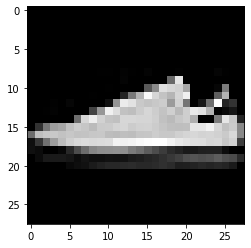

In [50]:
# tensor顯示圖片
img_t, _ = transformed_FashionMNIST[6] # 必回傳一圖片+label
plt.imshow(img_t[0][:][:], cmap='gray')
plt.show()

分辨涼鞋 運動鞋 踝鞋

In [43]:
label_map = {5: 0, 7: 1, 9: 2} 
class_names = ['sandal', 'sneaker', 'ankel boot'] 

FashionMNIST_sub = [(img, label_map[label]) 
          for img, label in transformed_FashionMNIST
          if label in [5, 7, 9]]
FashionMNIST_sub_val = [(img, label_map[label])
            for img, label in transformed_FashionMNIST_val
            if label in [5, 7, 9]]

訓練模型(LogSoftmax)

In [44]:
# 訓練層
model = nn.Sequential(
      nn.Linear(784, 512),
      nn.Tanh(),
      nn.Linear(512, 3),
      nn.LogSoftmax(dim=1))

測試

In [45]:
# 調整tensor為了fit model
img_batch = img_t.view(-1).unsqueeze(0) # 測試圖片img_t
out = model(img_batch) # 訓練結果 
out 

tensor([[-1.1994, -1.2611, -0.8788]], grad_fn=<LogSoftmaxBackward0>)

In [46]:
_, index = torch.max(out, dim=1) # 分類 機率中較大的 即為越像該物
index
class_names[int(index.numpy())] # 輸出名字

'ankel boot'

In [47]:
loss_fn = nn.NLLLoss() # 其相對應的loss function

In [48]:
learning_rate = 1e-2 # 學習率
optimizer = optim.SGD(model.parameters(), lr=learning_rate) # 優化器

In [49]:
n_epochs = 100
for epoch in range(n_epochs):
  for img, label in FashionMNIST_sub: 
    out = model(img.view(-1).unsqueeze(0)) 
    loss = loss_fn(out, torch.tensor([label])) 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.000241
Epoch: 1, Loss: 0.000083
Epoch: 2, Loss: 0.000034
Epoch: 3, Loss: 0.000034
Epoch: 4, Loss: 0.000028
Epoch: 5, Loss: 0.000028
Epoch: 6, Loss: 0.000015
Epoch: 7, Loss: 0.000037
Epoch: 8, Loss: 0.000002
Epoch: 9, Loss: 0.000049
Epoch: 10, Loss: 0.000007
Epoch: 11, Loss: 0.000001
Epoch: 12, Loss: 0.000001
Epoch: 13, Loss: 0.000000
Epoch: 14, Loss: 0.000000
Epoch: 15, Loss: 0.000004
Epoch: 16, Loss: 0.000000
Epoch: 17, Loss: 0.000000
Epoch: 18, Loss: 0.000002
Epoch: 19, Loss: 0.000000
Epoch: 20, Loss: 0.000000
Epoch: 21, Loss: 0.000000
Epoch: 22, Loss: 0.000000
Epoch: 23, Loss: 0.000000
Epoch: 24, Loss: 0.000000
Epoch: 25, Loss: 0.000000
Epoch: 26, Loss: 0.000000
Epoch: 27, Loss: 0.000000
Epoch: 28, Loss: 0.000000
Epoch: 29, Loss: 0.000000
Epoch: 30, Loss: 0.000000
Epoch: 31, Loss: 0.000000
Epoch: 32, Loss: 0.000000
Epoch: 33, Loss: 0.000000
Epoch: 34, Loss: 0.000000
Epoch: 35, Loss: 0.000000
Epoch: 36, Loss: 0.000000
Epoch: 37, Loss: 0.000000
Epoch: 38, Loss: 0.000